# RandomForest
**1. 개념**   
<p align="center">  
    <img src="https://user-images.githubusercontent.com/50131912/120589559-fffd3700-c473-11eb-946c-37b4130c10a4.JPG" width="400"/>  
</p>  

- 앙상블(ensemble) Machine learning 모델  
- 여러개의 decision tree를 형성하고 새로운 데이터 포인트를 각 트리에 동시에 통과시키며, 각 트리가 분류한 결과에서 투표를 실시하여 가장 많이 득표한 결과를 최종 분류 결과로 선택  
- RF가 생성한 일부 트리는 오버피팅이 될 수 있지만, 많은 수의 트리를 생성함으로써 오버피팅이 예층하는데 있어 큰 영향을 미치지 못하도록 예방  
- 트리를 형성할 때 데이터셋에만 변화를 주는 것이 아닌 Feature를 선택하는데 있어서도 부분 집합을 활용(m개의 feature가 존재할 때 임의로 선택하는 feature 수는 루트M개)  

**2. 장점**  
- 분류 및 회귀 문제에 모두 사용 가능  
- 결측치를 다루기 쉬움  
- 대용량 데이터 처리에 효과적  
- 모델의 노이즈를 심화시키는 오버피팅 문제를 회피하여 모델 정확도를 향상시킴  
- 상대적으로 중요한 변수를 선정 및 Ranking 가능  

**3. 파라미터**  
- n_estimators : 랜덤 포레스트 안의 결정 트리 갯수(클수록 좋지만 메모리와 훈련 시간이 증가)  
- max_features : 무작위로 선택할 Feature의 수(값이 커지면 트리들이 매우 비슷해지고 가장 두드러지진 특성에 맞게 예측할 것. 작으면 트리들이 서로 달라져 오버피팅이 줄어드는 효과가 있음)  


**4. 앙상블 학습 유형**  
   1) 배깅(Bagging))  
<p align="center"> 
    <img src=" https://user-images.githubusercontent.com/50131912/120590141-050eb600-c475-11eb-8a79-72871e8d1eb8.JPG" width="400"/>  
</p>  

- Bootstrap + Aggregating의 합성어  
- Bootstrap : 통계학에서 표본 분포를 구하기 위해 데이터를 여러번 복원 추출하는 것을 의미  
- 예 : RandomForest  


  2) 부스팅(Boosting)  
  - additive training : 여러 나무들을 합한다는 것을 의미  
  - sequential training : 여러 나무들을 동시에 학습하지 않고 한 나무가 학습된 결과를 바탕으로 더 나은 결과를 위해 다시 두번째 나무를 학습하고, 이 두 나무들보다 나은 결과를 위해 세 번째 나무를 학습하는 등 순서대로 학습한다는 의미  
  - 이전 나무에서 잘 못 분류한 관측치에 대해 다음 나무에서는 더 잘 학습하도록 함(다음 나무에서 관측치가 나타날 확률은 같지 않고, 가장 큰 오차를 보인 관측치들이 나타날 확률이 높도록 가중치를 설정)  
  - 예 : AdaBoost, Gradient Boosting Model, XGBoost
  
  
  
  
Source :  https://user-images.githubusercontent.com/50131912/120590141-050eb600-c475-11eb-8a79-72871e8d1eb8.JPG  
https://bioinformaticsandme.tistory.com/167  
https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-5-%EB%9E%9C%EB%8D%A4-%ED%8F%AC%EB%A0%88%EC%8A%A4%ED%8A%B8Random-Forest%EC%99%80-%EC%95%99%EC%83%81%EB%B8%94Ensemble  
https://assaeunji.github.io/ml/2020-08-06-tree/

 

## Import package

In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Load

In [2]:
path_dir = os.getcwd()
mem = pd.read_csv(path_dir+'/data/E-commerce/member.csv')
tran = pd.read_csv(path_dir+'/data/E-commerce/transaction.csv')

In [4]:
display(mem.info())
display(mem.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64000 entries, 0 to 63999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           64000 non-null  int64 
 1   recency      64000 non-null  int64 
 2   zip_code     64000 non-null  object
 3   is_referral  64000 non-null  int64 
 4   channel      64000 non-null  object
 5   conversion   64000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 2.9+ MB


None

,id,recency,is_referral,conversion
count,64000.000000,64000.000000,64000.000000,64000.000000
mean,550694.137797,5.763734,0.502250,0.146781
std,259105.689773,3.507592,0.499999,0.353890
min,100001.000000,1.000000,0.000000,0.000000
25%,326772.000000,2.000000,0.000000,0.000000
50%,551300.000000,6.000000,1.000000,0.000000
75%,774914.500000,9.000000,1.000000,0.000000
max,999997.000000,12.000000,1.000000,1.000000


In [5]:
display(tran.info())
display(tran.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196836 entries, 0 to 196835
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   id            196836 non-null  int64
 1   num_item      196836 non-null  int64
 2   total_amount  196836 non-null  int64
dtypes: int64(3)
memory usage: 4.5 MB


None

,id,num_item,total_amount
count,196836.000000,196836.000000,196836.000000
mean,550557.552932,3.078365,21837.102969
std,259254.795613,1.478408,8218.005565
min,100001.000000,1.000000,8000.000000
25%,326719.000000,2.000000,15000.000000
50%,550918.000000,3.000000,22000.000000
75%,774916.000000,4.000000,29000.000000
max,999997.000000,6.000000,38000.000000


## Preprocessing
### 데이터 Merge

In [6]:
tran['avg_price'] = tran['total_amount']/tran['num_item']
tran_mean = tran.groupby(['id']).mean()
tran_cnt = tran['id'].value_counts()

In [7]:
tran_df = pd.concat([tran_mean, tran_cnt], axis = 1)
# tran_df.columns = ['num_item', 'total_amount', 'avg_price', 'count']
tran_df = tran_df.rename(columns = {'id':'count'})
tran_df

,num_item,total_amount,avg_price,count
100001,3.500000,26000.000000,7500.000000,2
100008,5.000000,26000.000000,5200.000000,1
100032,2.666667,20666.666667,9366.666667,3
100036,3.000000,25800.000000,13273.333333,5
100070,3.250000,21250.000000,8537.500000,4
...,...,...,...,...
999932,5.000000,32000.000000,6400.000000,1
999981,2.000000,22750.000000,12875.000000,4
999990,3.000000,28000.000000,10388.888889,3
999995,2.000000,27000.000000,13500.000000,1


In [8]:
mem.set_index('id', inplace=True)
data = mem.join(tran_df)
data.head()

,recency,zip_code,is_referral,channel,conversion,num_item,total_amount,avg_price,count
id,,,,,,,,,
906145,10,Surburban,0,Phone,0,3.333333,31333.333333,14016.666667,3
184478,6,Rural,1,Web,0,4.000000,29000.000000,7250.000000,1
394235,7,Surburban,1,Web,0,4.000000,20500.000000,5125.000000,2
130152,9,Rural,1,Web,0,1.750000,20750.000000,14875.000000,4
940352,2,Urban,0,Web,0,3.000000,31000.000000,10333.333333,1


In [9]:
data.isna().sum()

recency         0
zip_code        0
is_referral     0
channel         0
conversion      0
num_item        0
total_amount    0
avg_price       0
count           0
dtype: int64

### 카테고리 변수 처리

In [10]:
data = pd.get_dummies(data, columns=['zip_code', 'channel'], drop_first=True)

## Modeling

1. 평가지표
<p align="center"> 
    <img src="https://user-images.githubusercontent.com/50131912/120584969-ddffb680-c46b-11eb-9419-ffb47f4fba7b.JPG"/>  
</p>  

- Accuracy(정확도) : 전체 중에 정답을 맞춘 비율
- Precision(정밀도) : 모델이 True라고 예측한 것 중에 실제 True 비율  
- Recall(재현율) : 실제 True인 것 중에서 모델이 True라고 예측한 비율(Sensitivity 민감도라고도 불림)  
- F1 Score : Precision과 Recall의 조화평균. 두 지표를 모두 균형있게 반영  
  
  
Source : https://statinknu.tistory.com/35



In [11]:
from sklearn.model_selection import train_test_split

x = data.drop(['conversion'], axis=1)
y = data['conversion']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [12]:
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(max_depth = 10, random_state = 10)

model.fit(x_train, y_train)

pred = model.predict(x_test)

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


accuracy_score(y_test, pred)

confusion_matrix(y_test, pred)


array([[16407,    56],
       [ 2354,   383]], dtype=int64)

In [14]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93     16463
           1       0.87      0.14      0.24      2737

    accuracy                           0.87     19200
   macro avg       0.87      0.57      0.59     19200
weighted avg       0.87      0.87      0.83     19200



## Modeling 2 - Random Forest Regression

In [15]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=10, random_state=100)

rf.fit(x_train, y_train)

pred2 = rf.predict(x_test)

# df_re = pd.DataFrame(pred2)
# df_re.head()

In [16]:
result_comp = [1 if x>=0.5 else 0 for x in pred2]

print(accuracy_score(y_test, result_comp))

confusion_matrix(y_test, result_comp)

0.8799479166666667


array([[16313,   150],
       [ 2155,   582]], dtype=int64)

In [18]:
rf.feature_importances_

array([0.04990395, 0.02138491, 0.37591972, 0.1396865 , 0.23017582,
       0.16508618, 0.00303231, 0.00371579, 0.00697822, 0.0041166 ])

In [20]:
x_train.columns

Index(['recency', 'is_referral', 'num_item', 'total_amount', 'avg_price',
       'count', 'zip_code_Surburban', 'zip_code_Urban', 'channel_Phone',
       'channel_Web'],
      dtype='object')

<AxesSubplot:>

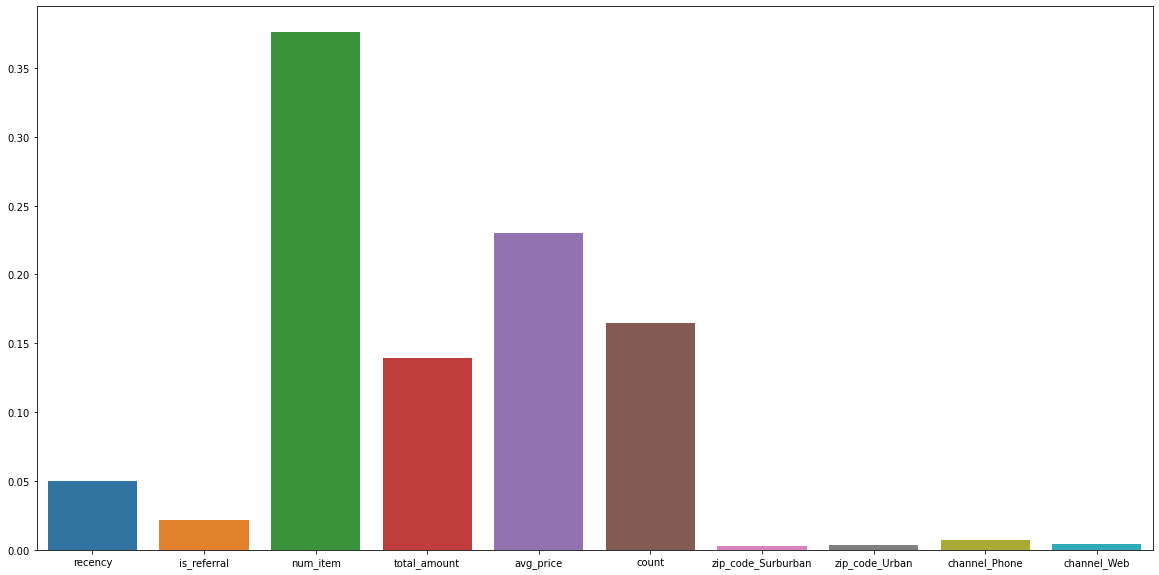

In [21]:
plt.figure(figsize=(20, 10))
sns.barplot(x = x_train.columns, y = rf.feature_importances_)